  Category                     Description  Nutrient Data Bank Number  \
0     Milk                     Milk, human                   11000000   
1     Milk                       Milk, NFS                   11100000   
2     Milk                     Milk, whole                   11111000   
3     Milk         Milk, low sodium, whole                   11111100   
4     Milk  Milk, calcium fortified, whole                   11111150   

   Data.Alpha Carotene  Data.Beta Carotene  Data.Beta Cryptoxanthin  \
0                    0                   7                        0   
1                    0                   4                        0   
2                    0                   7                        0   
3                    0                   7                        0   
4                    0                   7                        0   

   Data.Carbohydrate  Data.Cholesterol  Data.Choline  Data.Fiber  ...  \
0               6.89                14          16.0         

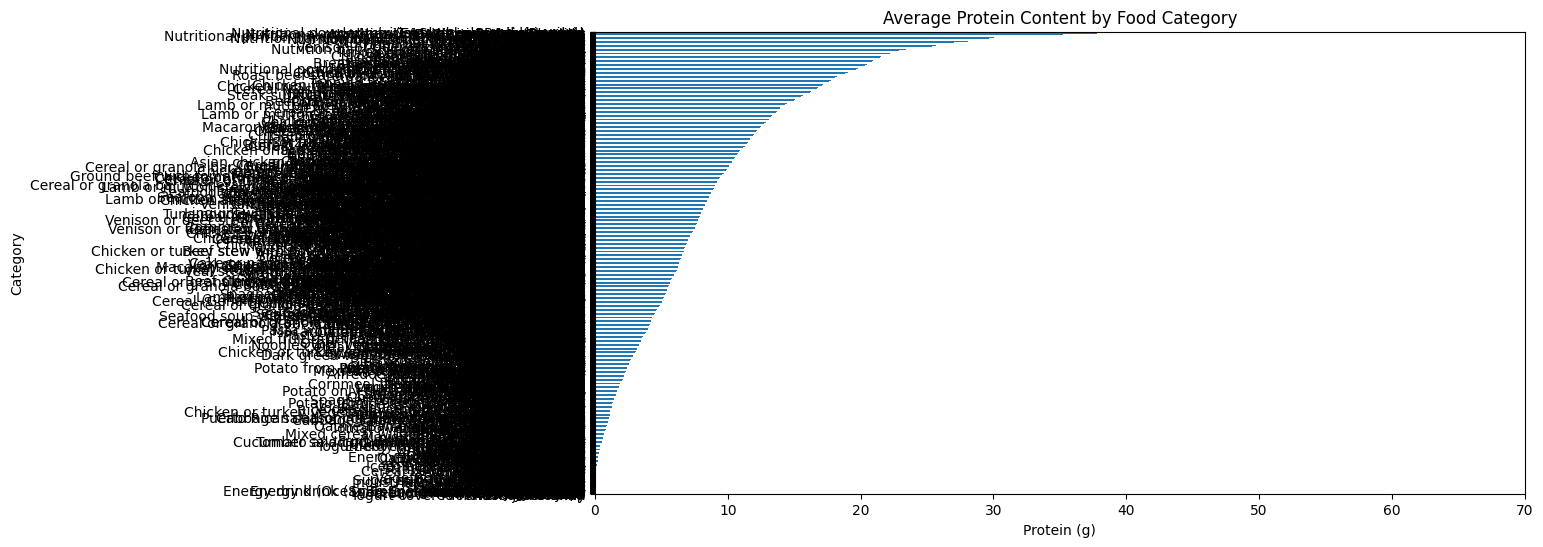

                                            Description  protein_density  \
6818                        Soft drink, root beer, diet             25.0   
6799  Carbonated water, sweetened, with low-calorie ...             25.0   
6752                              Tea, hot, leaf, green             25.0   
6782              Tea, iced, brewed, green, unsweetened             25.0   
6810                       Soft drink, cream soda, diet             25.0   
6812    Soft drink, fruit flavored, diet, caffeine free             25.0   
6814  Soft drink, fruit flavored, caffeine containin...             25.0   
6816                       Soft drink, ginger ale, diet             25.0   
6681                 Iced Coffee, brewed, decaffeinated             25.0   
6703  Coffee, NS as to brewed or instant, decaffeinated             25.0   

      kcal_est  
6818      0.40  
6799      0.40  
6752      0.88  
6782      0.88  
6810      0.40  
6812      0.40  
6814      0.40  
6816      0.40  
6681      

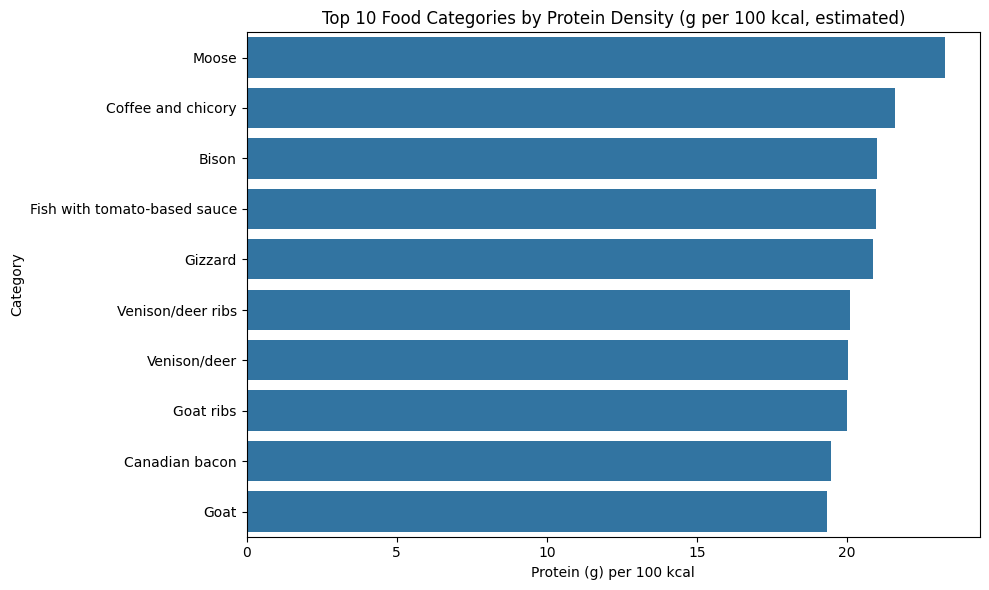

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('food.csv')

# Display the first 5 rows to see what nutrients we have
print(df.head())

# Basic Food Science Insight: Let's see which food groups have the most Protein
plt.figure(figsize=(12,6))
df.groupby('Category')['Data.Protein'].mean().sort_values().plot(kind='barh')
plt.title('Average Protein Content by Food Category')
plt.xlabel('Protein (g)')
plt.show()


# Load the data
df = pd.read_csv('food.csv')

# Estimate calories (kcal) from macros
df["kcal_est"] = (
    4 * df ["Data.Protein"].fillna(0) +
    4 * df ["Data.Carbohydrate"].fillna(0) +
    9 * df ["Data.Fat.Total Lipid"]. fillna (0)
)

#filter zero/invalid kcal
df_filtered = df[df["kcal_est"] > 0].copy()
#protein density (g/100kcal)
df_filtered["protein_density"] = (
    df_filtered["Data.Protein"] / df_filtered["kcal_est"] * 100
)
# Show top 10 foods by protein density
top_protein_density = df_filtered.sort_values(by="protein_density", ascending=False).head(10)
print(top_protein_density[["Description", "protein_density", "kcal_est"]])

# Advanced Food Science Insight: Protein Density Analysis
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtered, x="kcal_est", y="protein_density", hue="Category")
plt.xscale('log')
plt.yscale('log')
plt.title('Protein Density vs Estimated Calories')
plt.xlabel('Estimated Calories (kcal, log scale)')
plt.ylabel('Protein Density (g/100kcal, log scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  



# Top 10 food categories by average protein density
top_protein = df_filtered.groupby('Category')['protein_density'].mean().sort_values(ascending =False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_protein.values, y=top_protein.index)
plt.title("Top 10 Food Categories by Protein Density (g per 100 kcal, estimated)")
plt.xlabel("Protein (g) per 100 kcal")
plt.tight_layout()
plt.show()
